In [1]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
%matplotlib inline
sns.set()
sns.set_style('white')
#warnings.filterwarnings('ignore')

In [45]:
data1 = loadmat('ex6data1')
x, y = data1['X'], data1['y']
pos = np.array(list(x[number] for number in range(x.shape[0]) if y[number] == 1))
neg = np.array(list(x[number] for number in range(x.shape[0]) if y[number] == 0))

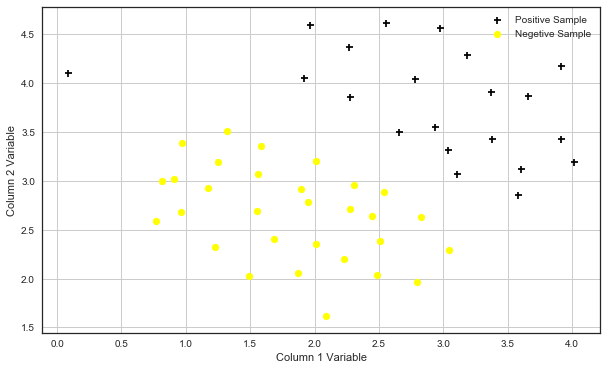

In [55]:
def plotData():
    plt.figure(figsize=(10, 6))
    plt.scatter(pos[:, 0], pos[:, 1], marker = '+', label = 'Positive Sample', color = 'black')
    plt.scatter(neg[:, 0], neg[:, 1], marker = 'o', label = 'Negetive Sample', color = 'yellow')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plotData()